
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** 

### Ans: This is a classification problem as our aim is to create a model that predicts whether a student pass their high school final exam. And specifically it is a binary classification problem.

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read student data
data = pd.read_csv('student-data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [3]:
# Calculate number of students
n_students=data.shape[0]

In [4]:
# Calculate number of features
n_features=data.shape[1]

In [5]:
# Calculate passing students
n_passed=data['passed'].value_counts()['yes']

In [6]:
# Calculate failing students
n_failed=data['passed'].value_counts()['no']

In [7]:
# Calculate graduation rate
grad_rate = n_passed/(n_students) *100

In [8]:
# Print the results
print('The number of students = ',n_students)
print('The number of features = ',n_features)
print('The number of passing students = ',n_passed)
print('The number of failing students = ',n_failed)
print('The graduation rate = ',grad_rate)

The number of students =  395
The number of features =  31
The number of passing students =  265
The number of failing students =  130
The graduation rate =  67.08860759493672


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [9]:
# Extract feature columns

In [10]:
data.drop('passed',axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,5,4,11
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,3
392,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,no,5,5,3,3,3,3,3
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,3,4,5,0


In [11]:
# Extract target column 'passed'

In [12]:
data['passed']

0       no
1       no
2      yes
3      yes
4      yes
      ... 
390     no
391    yes
392     no
393    yes
394     no
Name: passed, Length: 395, dtype: object

In [13]:
# Separate the data into feature data and target data (X and y, respectively)

In [14]:
X = data.drop('passed',axis=1)
y = data['passed']

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [15]:
#First check the columns with object data type
X.select_dtypes(exclude=['int64','float64'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [16]:
#Now check how many unique values found in each object column
for i in X.select_dtypes(exclude=['int64','float64']).columns:
    print(i,X[i].unique())

school ['GP' 'MS']
sex ['F' 'M']
address ['U' 'R']
famsize ['GT3' 'LE3']
Pstatus ['A' 'T']
Mjob ['at_home' 'health' 'other' 'services' 'teacher']
Fjob ['teacher' 'other' 'services' 'health' 'at_home']
reason ['course' 'other' 'home' 'reputation']
guardian ['mother' 'father' 'other']
schoolsup ['yes' 'no']
famsup ['no' 'yes']
paid ['no' 'yes']
activities ['no' 'yes']
nursery ['yes' 'no']
higher ['yes' 'no']
internet ['no' 'yes']
romantic ['no' 'yes']


In [17]:
#Now use label encoder for the category columns with binary data.
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()
col_list=['school','sex','address','famsize', 'Pstatus','schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']
for a in np.arange(len(col_list)):
    X[col_list[a]] = label_en.fit_transform(X[col_list[a]])    

In [18]:
#Now let's  use get_dummies for the remaining categorical columns which are not binary
dummy_cols = ['Mjob', 'Fjob', 'reason', 'guardian']
X = pd.get_dummies(X,drop_first=True)

In [19]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,18,1,0,0,4,4,2,2,...,0,0,0,0,1,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,...,0,0,1,0,0,0,0,0,0,0
2,0,0,15,1,1,1,1,1,1,2,...,0,0,1,0,0,0,1,0,1,0
3,0,0,15,1,0,1,4,2,1,3,...,0,0,0,1,0,1,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,...,0,0,1,0,0,1,0,0,0,0


In [20]:
X.shape

(395, 39)

In [21]:
# Now we have 39 columns

### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [22]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.24)

In [23]:
# Show the results of the split
print('X_train : ',X_train.shape)
print('X_test : ',X_test.shape)
print('y_train : ',len(y_train))
print('y_test : ',len(y_test))

X_train :  (300, 39)
X_test :  (95, 39)
y_train :  300
y_test :  95


We have 300 data points on training set and 95 data points on testing set.

### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

Answer: The three models that are appropriate for this problem are : Logistic Regression, KNN, and SVM. 
These three models are chosen because our probelm is a classification problem and that too binary. More details about each models are given below. 

In [24]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [26]:
# fit model-1  on traning data 

### Logistic Regression

Logistic regression is a classification algorithm used to find the probability of event success and event failure.

Logistic regression is easier to implement, interpret, and very efficient to train.	
If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting.



In [27]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [28]:
# predict on the test data 

In [29]:
y_pred_lr = model.predict(X_test)

In [30]:
# calculate the accuracy score

In [31]:
accuracy_score(y_test,y_pred_lr)

0.7052631578947368

In [32]:
confusion_matrix(y_test,y_pred_lr)

array([[13, 22],
       [ 6, 54]], dtype=int64)

#### Logistic regression gives an accuracy of 70%.

In [33]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy

### KNearestNeighbors

KNN is a very simple algorithm used to solve classification problems.There is no training period for KNN. It stores the training dataset and learns from it only at the time of making real time predictions.

Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm.

Does not work well with large dataset: In large datasets, the cost of calculating the distance between the new point and each existing points is huge which degrades the performance of the algorithm.

In [34]:
neighbors = np.arange(3,15)
acc_vals = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_vals.append(acc)
    

Text(0, 0.5, 'accuracy')

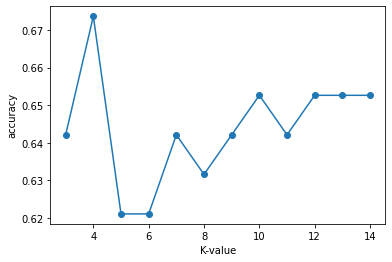

In [35]:
plt.plot(neighbors,acc_vals,'o-')
plt.xlabel('K-value')
plt.ylabel('accuracy')

In [36]:
#Use k=4
model = KNeighborsClassifier(n_neighbors=4,metric='euclidean')
model.fit(X_train,y_train)
y_pred_k = model.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred_k)

0.6736842105263158

In [38]:
confusion_matrix(y_test,y_pred_k)

array([[17, 18],
       [13, 47]], dtype=int64)

#### KNN gives an accuracy of 67%

In [39]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy

### Support Vector Machine

SVM is effective in cases where the number of dimensions is greater than the number of samples<br>
SVM algorithm is not suitable for large data sets.<br>
SVM does not perform very well when the data set has more noise i.e. target classes are overlapping.

In [40]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)
y_pred_s = model.predict(X_test)

In [41]:
#linear
accuracy_score(y_test,y_pred_s)

0.6947368421052632

In [42]:
confusion_matrix(y_test,y_pred_s)

array([[14, 21],
       [ 8, 52]], dtype=int64)

####  SVM gives an accuracy of 69%

### Comparing all the three Logistic Regression performed the best.

### Extra

### RandomForestClassifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

In [44]:
y_pred = rf.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred)

0.6631578947368421

In [46]:
confusion_matrix(y_test,y_pred)

array([[ 8, 27],
       [ 5, 55]], dtype=int64)

### RandomForest gives an accuracy of 66% 

## End